# Exploring the maths of binding

In [3]:
%pylab inline 
import tellurium as te #python package for working with models 

Populating the interactive namespace from numpy and matplotlib


## Integrating a constant

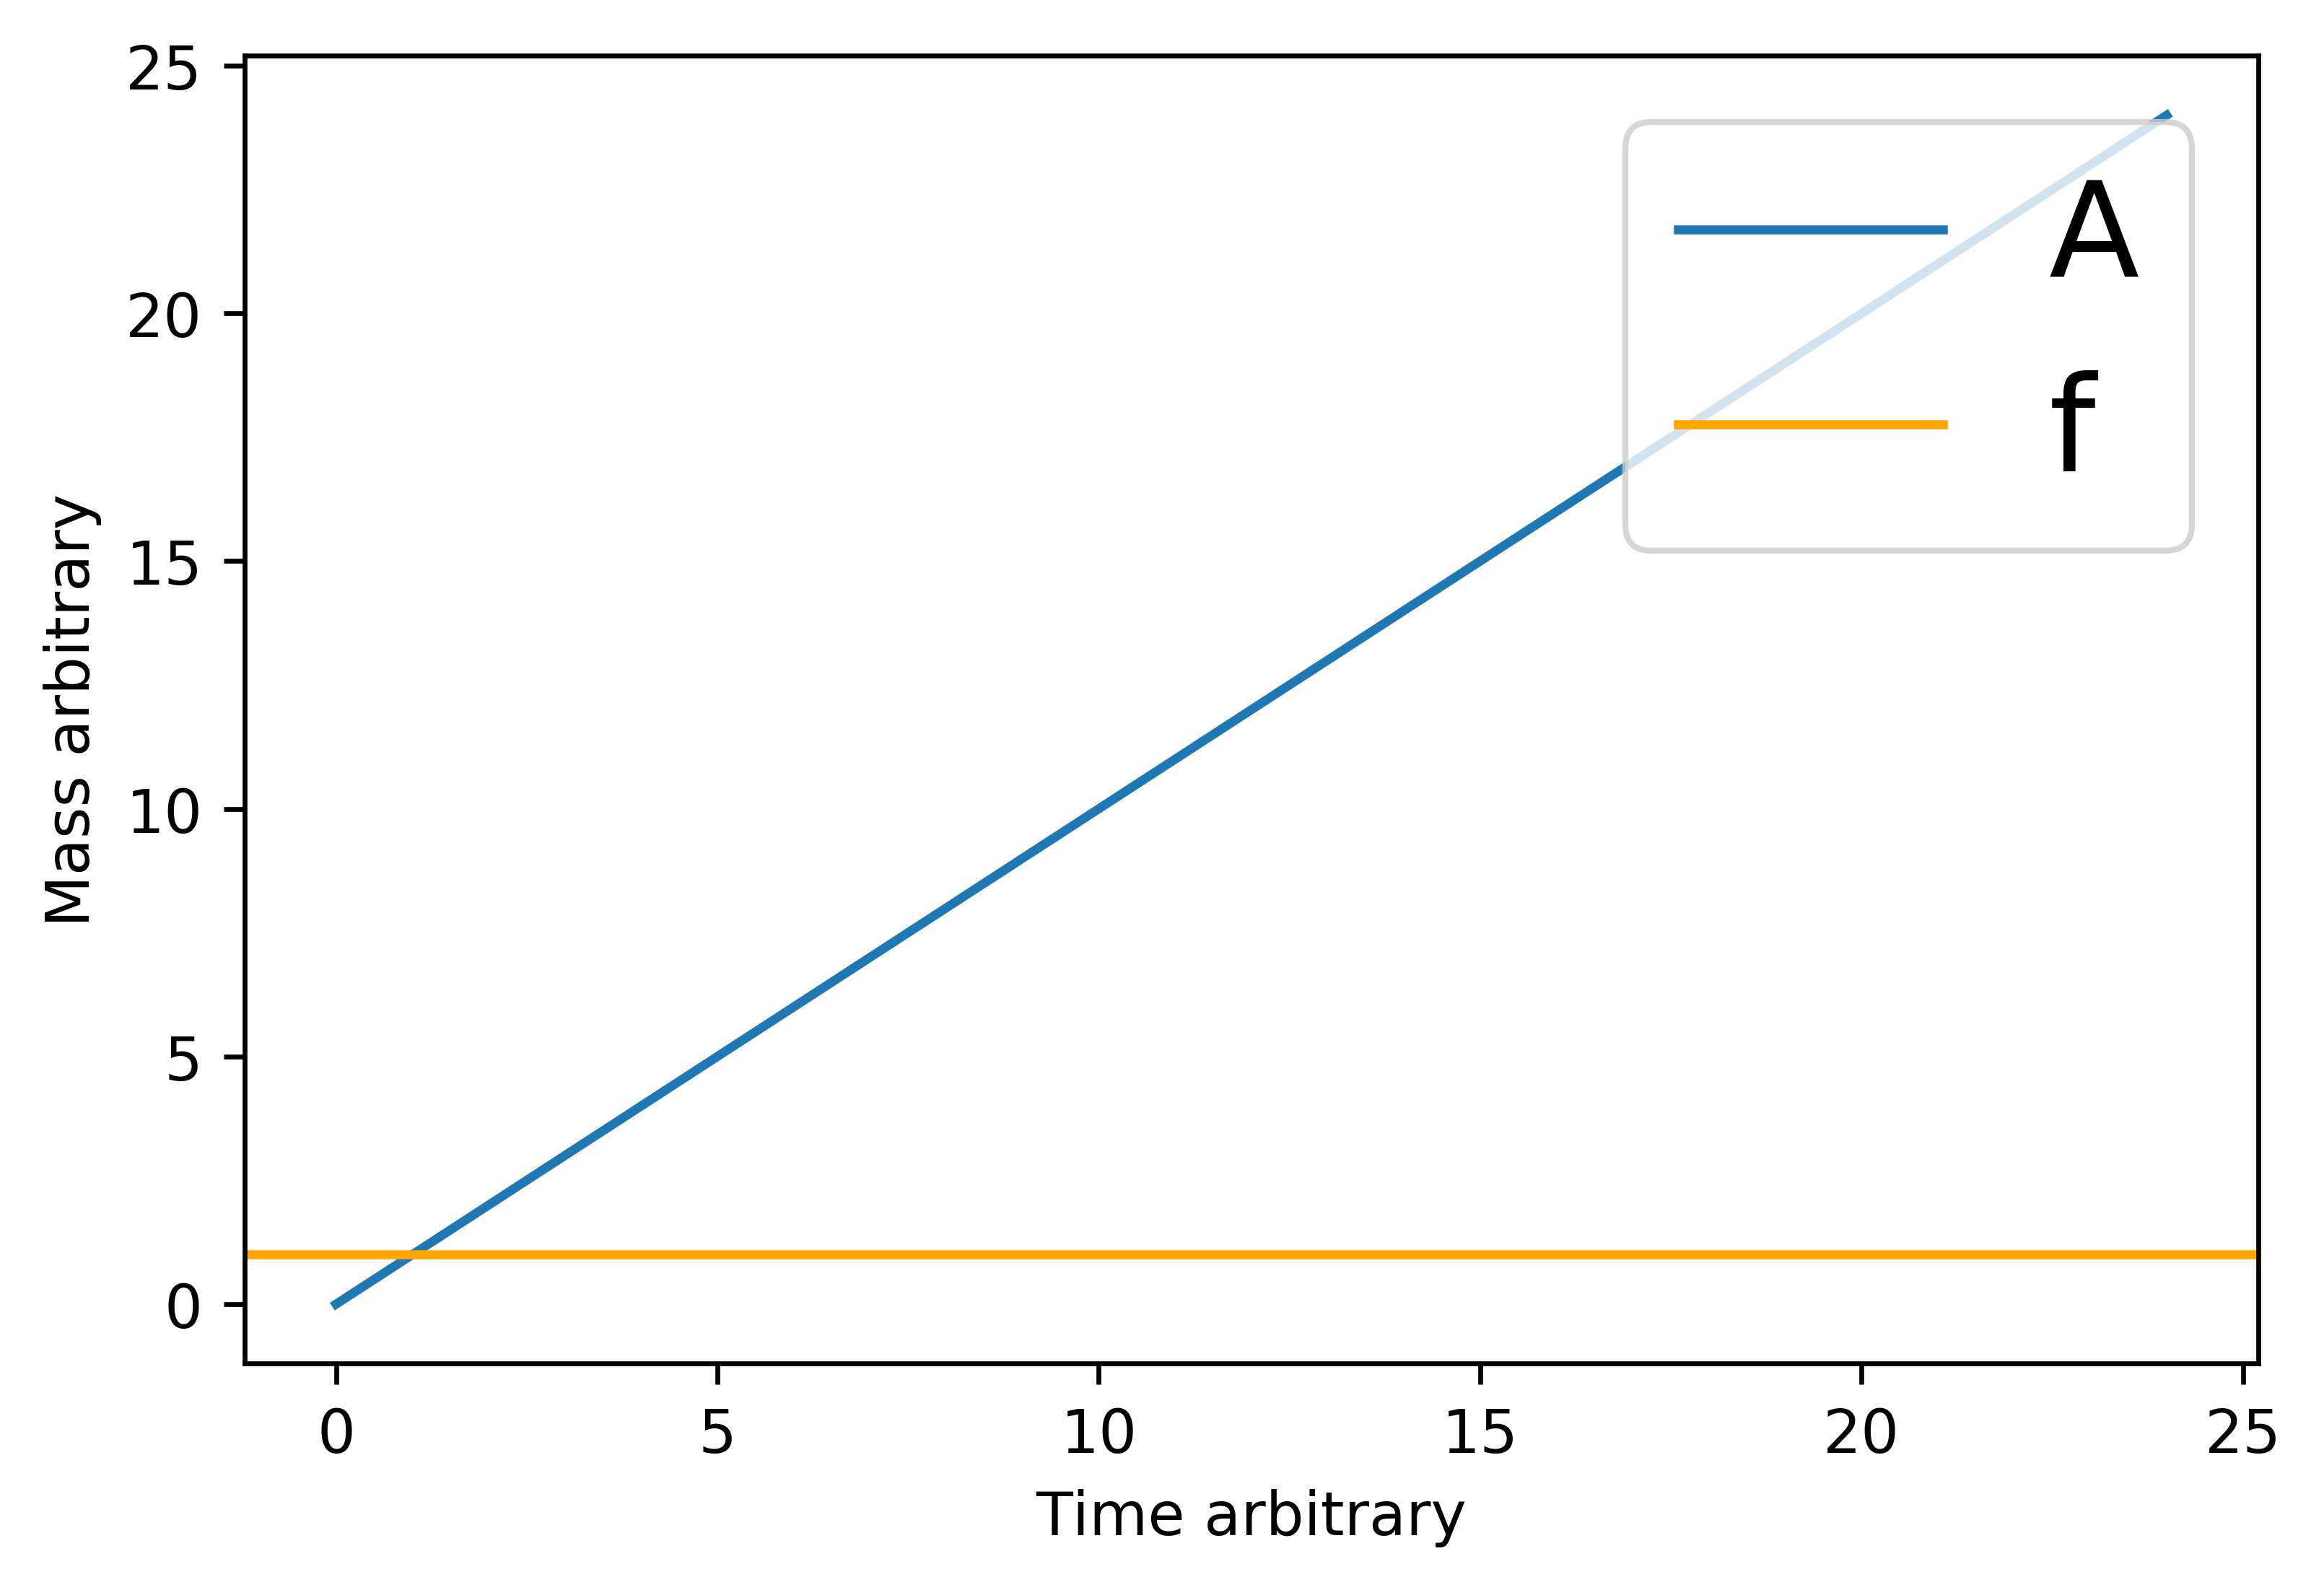

In [4]:
#loads the model defined in a plain text file
constant_integration = te.loadAntimonyModel('constant_integartion.txt')

#perfom a numerical integration for the model over the range 0 - 24 with 1000 points inbetween
results = constant_integration.simulate(0,24,1000)


#set the resolution of the figure to be plotted 
figure(dpi=600)

# plot the results 
plot(results['time'],results['[A]'], label='A')

#draws a horizontal yellow line 
axhline(1, color='orange', label='f')

#labels for the axis
xlabel('Time arbitrary')
ylabel('Mass arbitrary')

#legeng location  and fontsize, axis labels can also take font size
legend(loc='upper right', fontsize=22)

## Integrating a linear rate

(-10, 25)

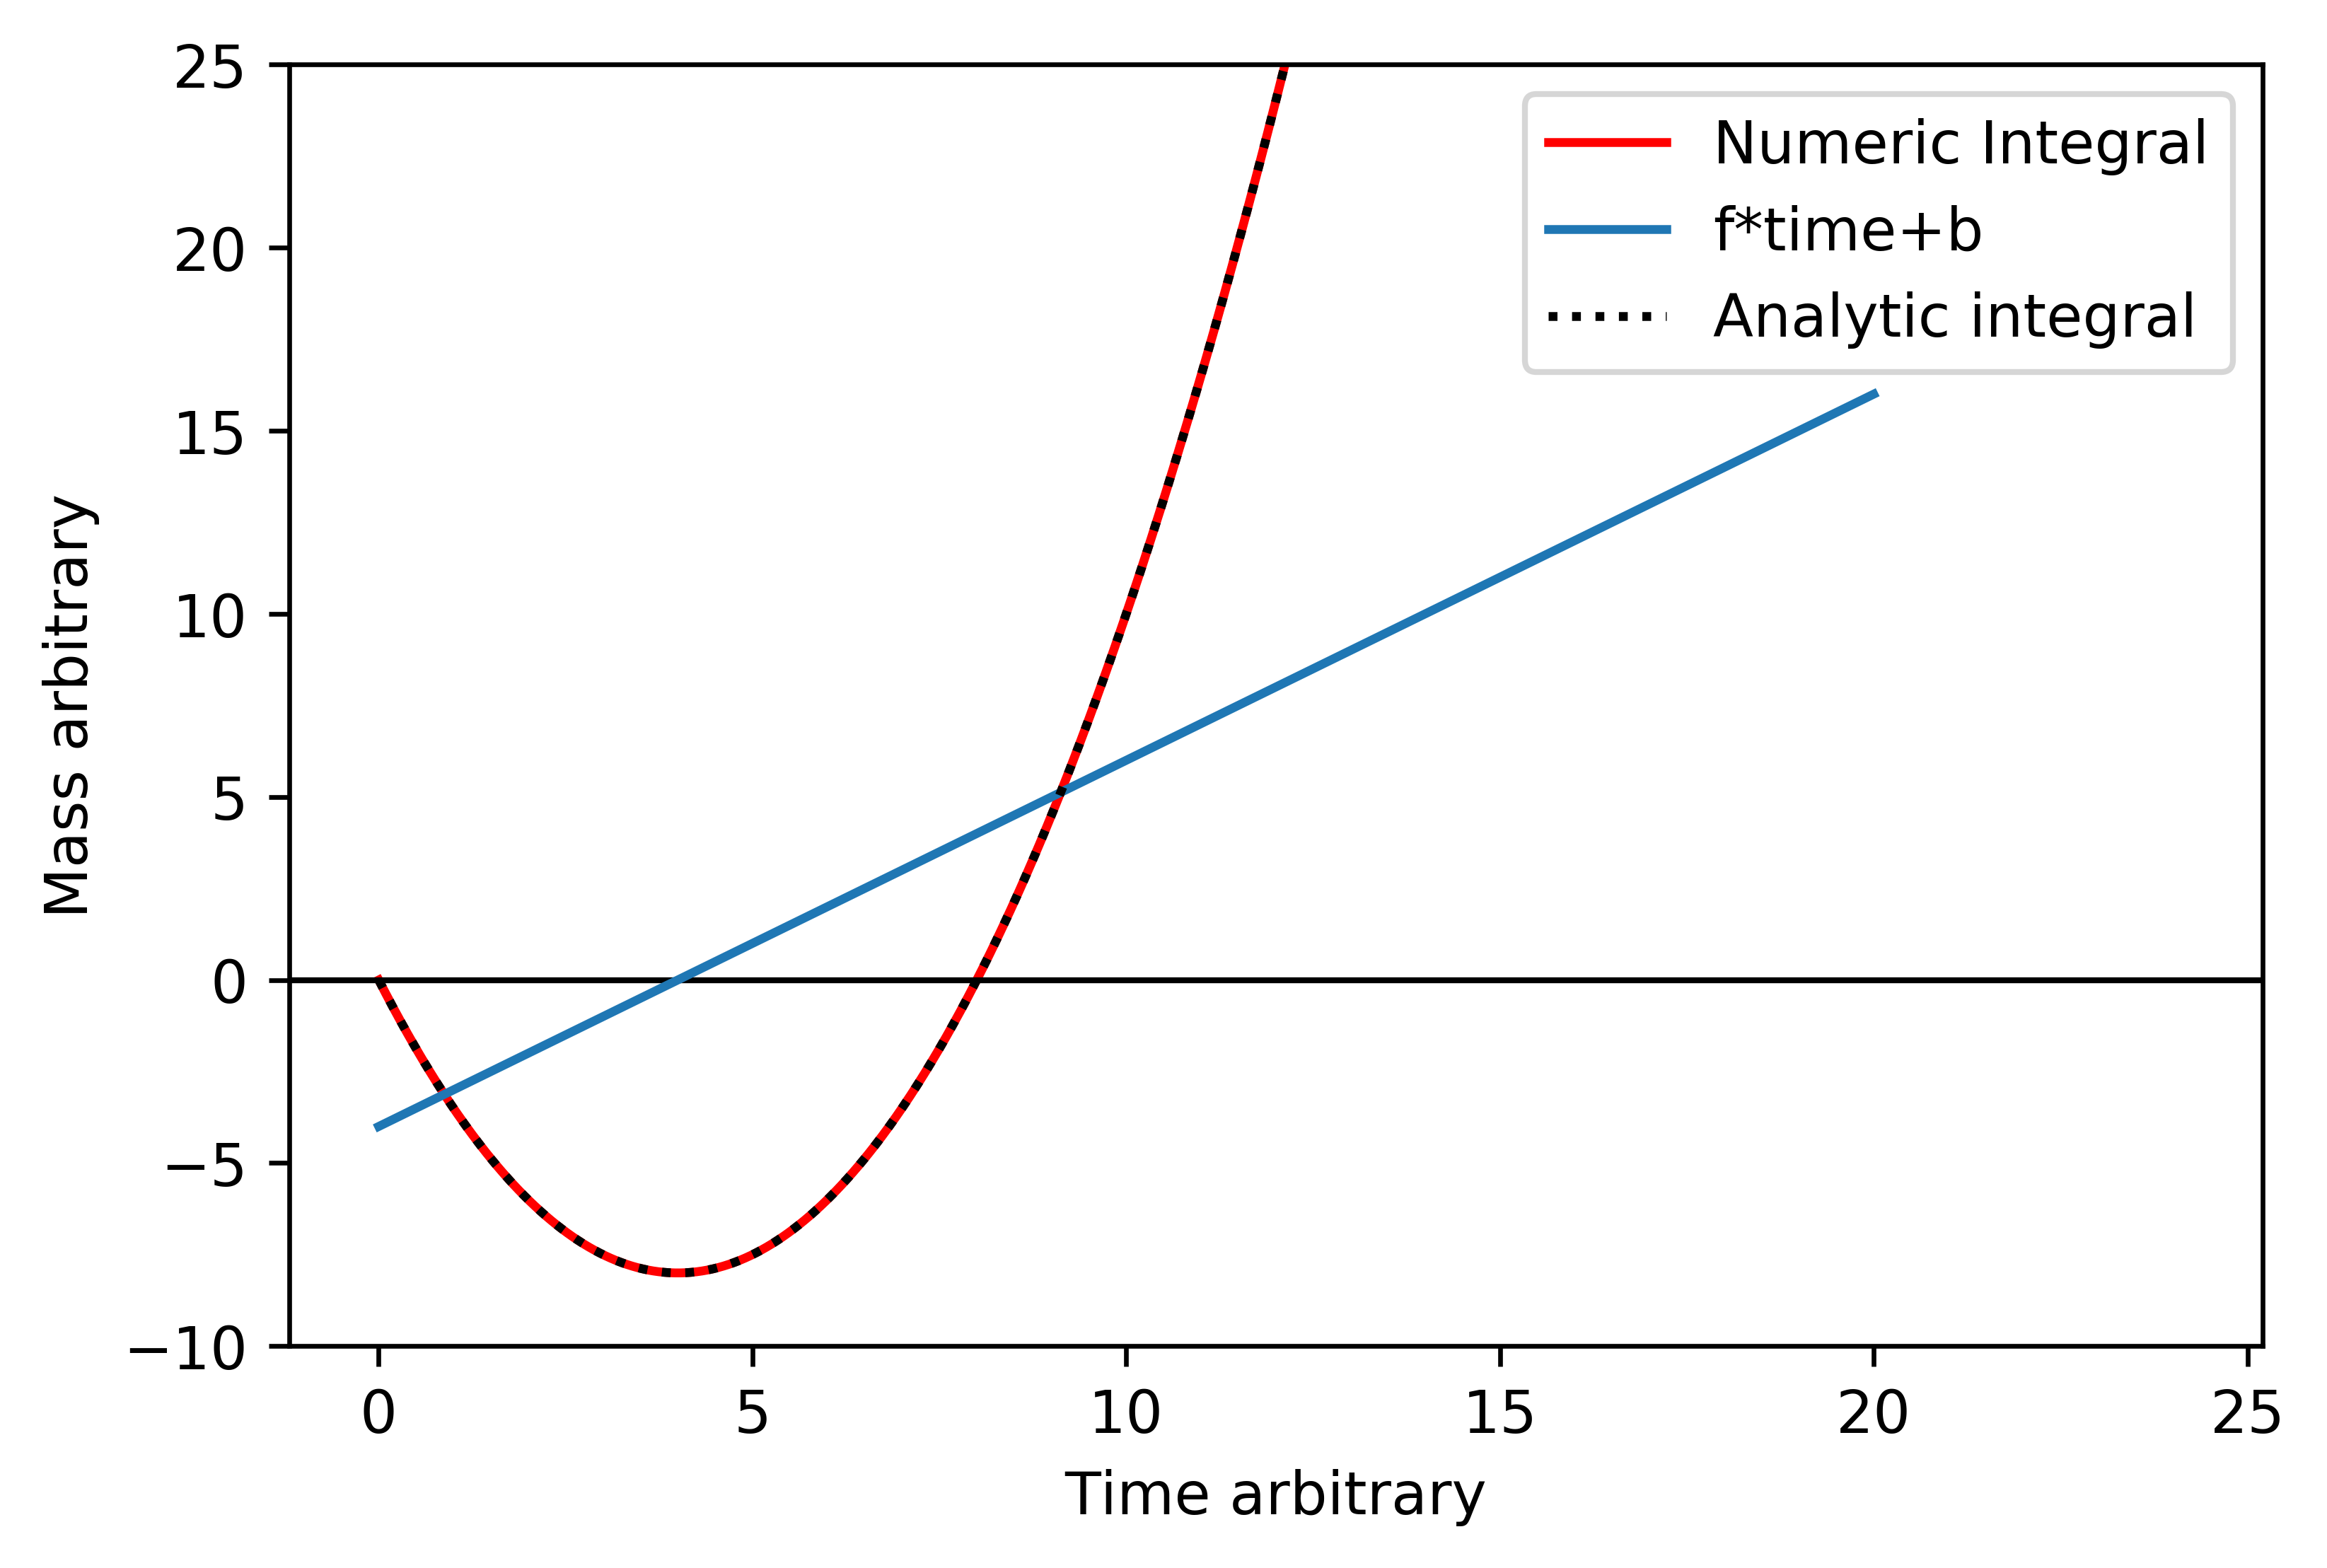

In [7]:
line_integration = te.loadAntimonyModel('line_integartion.txt')

results = line_integration.simulate(0,24,1000)
figure(dpi=600)
plot(results['time'],results['[A]'], '-',label='Numeric Integral', color='red')

axhline(0, color='black', lw=1)

f = line_integration.getValue('f')
b = line_integration.getValue('b')
time = linspace(0,20,1000)

y = f*time+b
plot(time,y, label='f*time+b')

#analytic integration
y_int = f/2*time**2+b*time


plot(time,y_int, ':',label='Analytic integral', color='black')

xlabel('Time arbitrary')
ylabel('Mass arbitrary')
legend(loc='upper right')
ylim(-10,25)


## Dynamics of simple binding

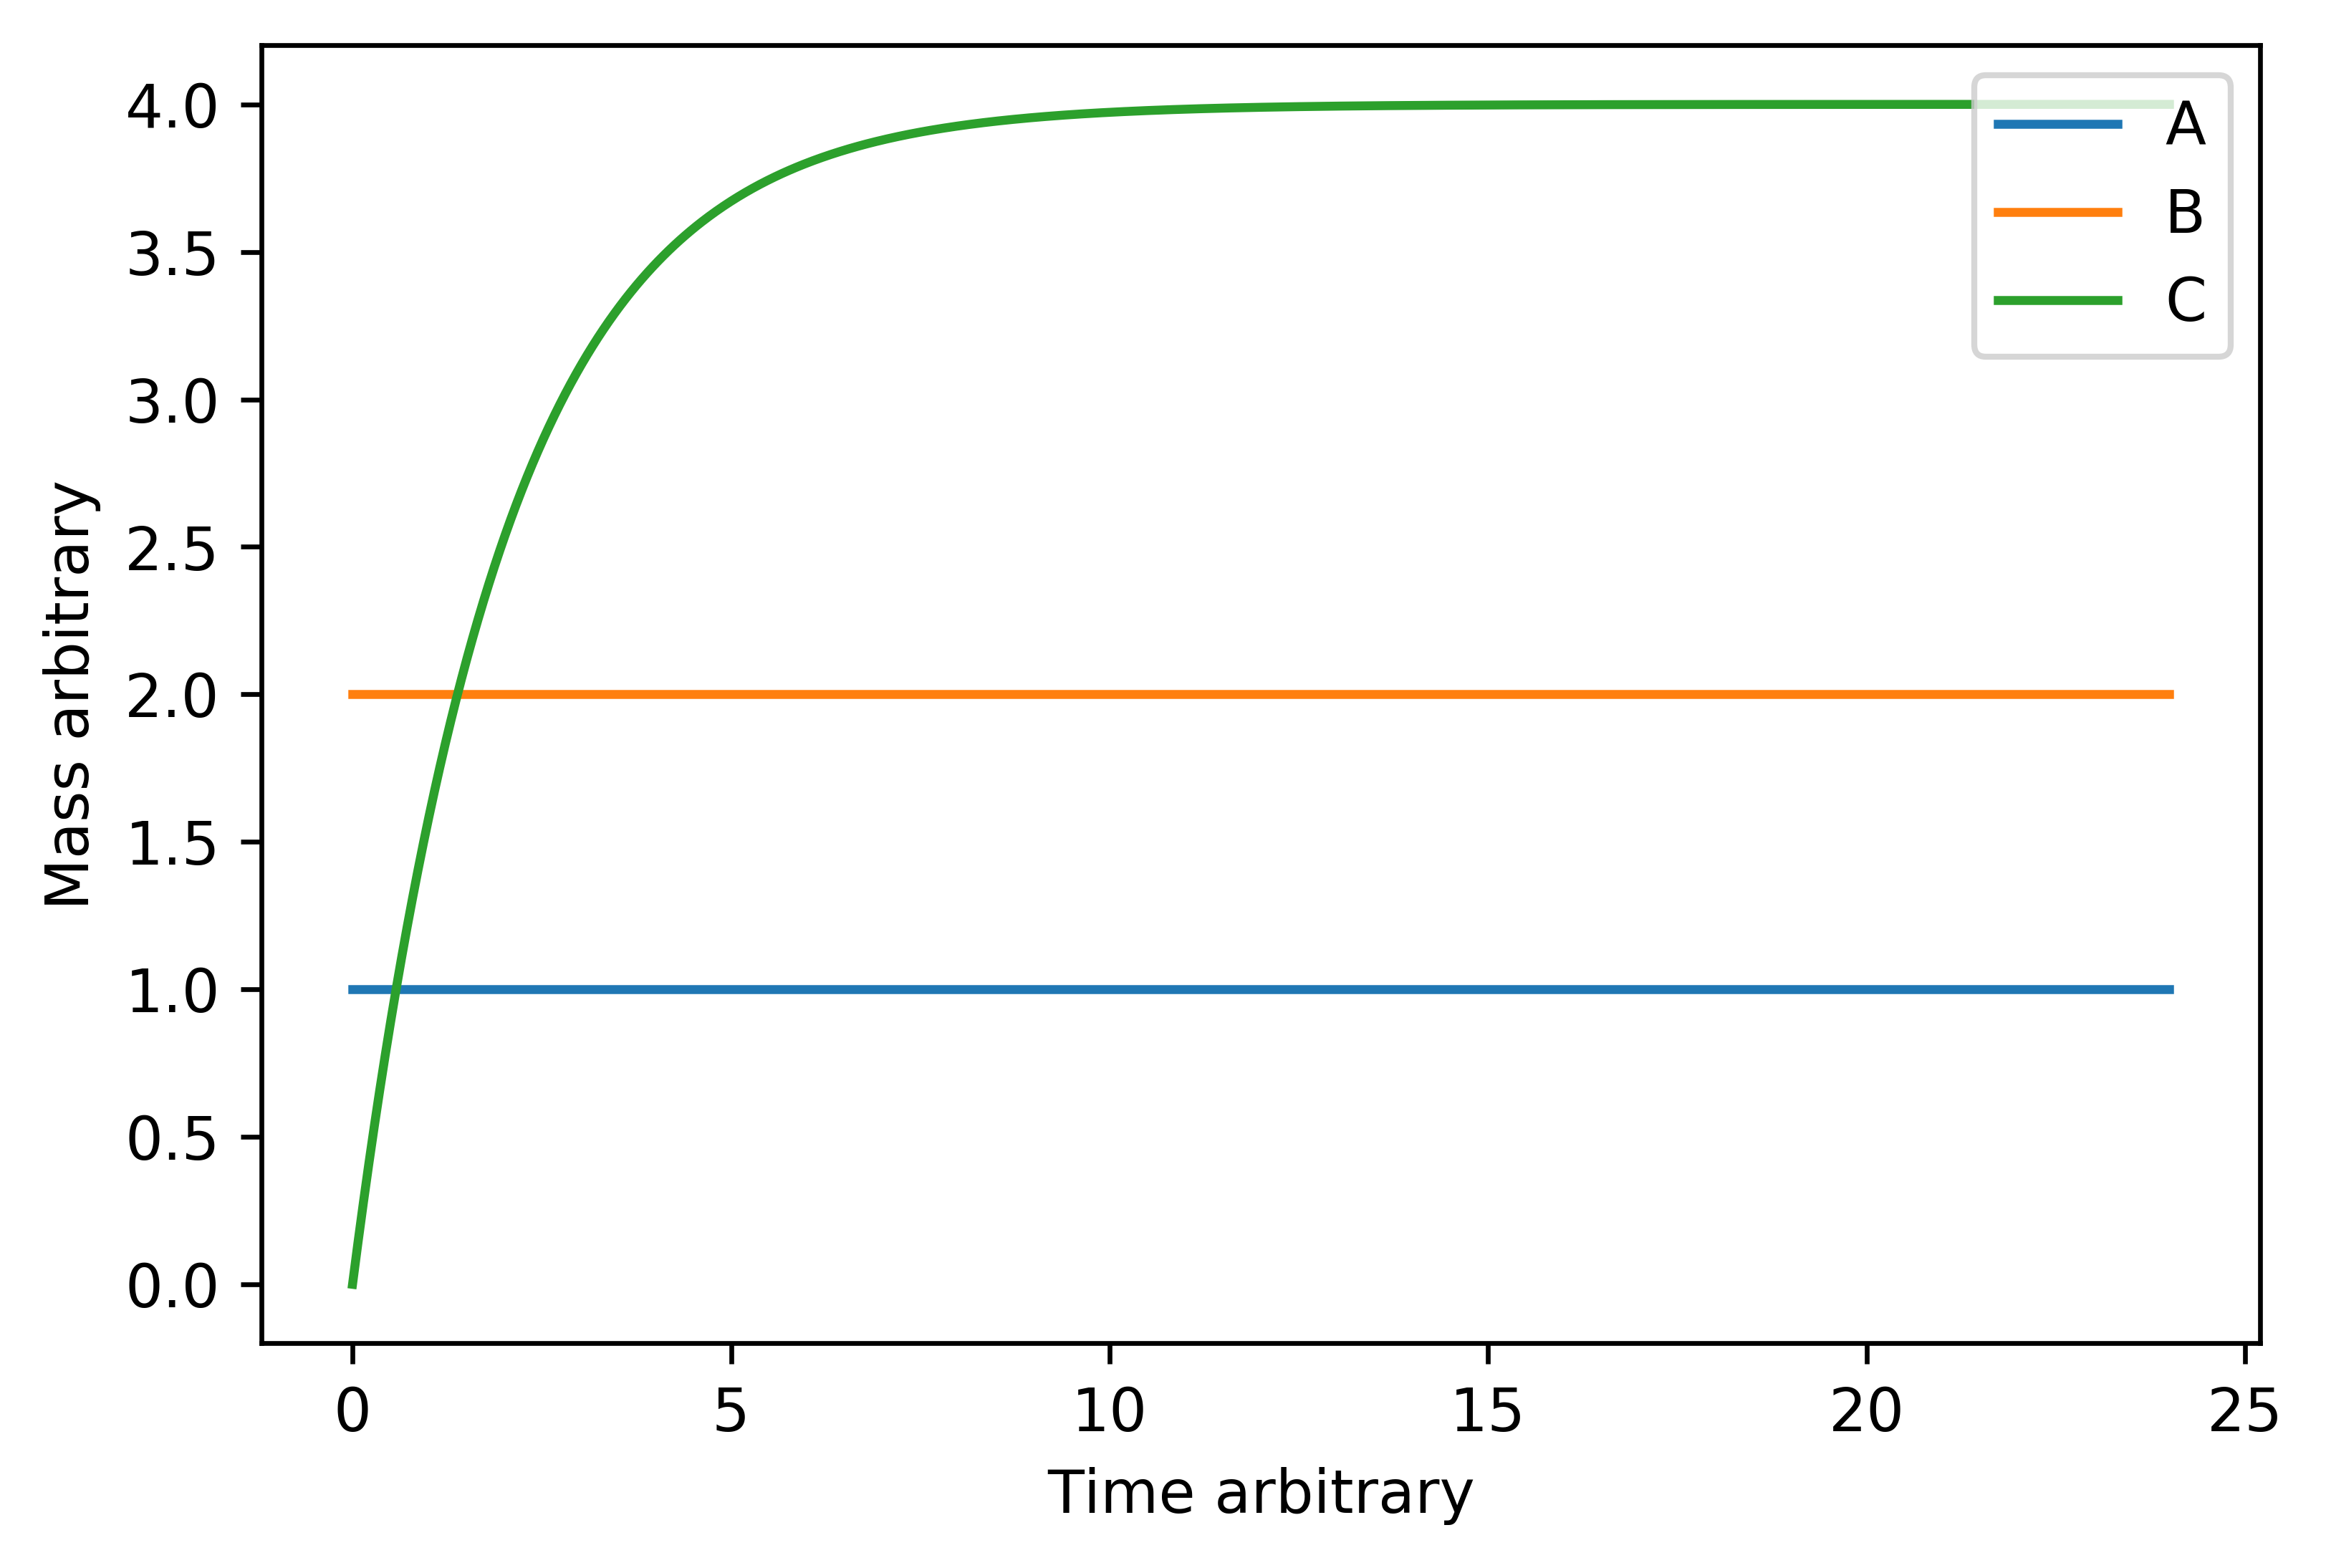

In [9]:
figure(dpi=600)
simple_reaction = te.loadAntimonyModel('simple_reaction.txt')

results = simple_reaction.simulate(0,24,1000)

plot(results['time'],results['[A]'], label='A')
plot(results['time'],results['[B]'], label='B')
plot(results['time'],results['[C]'], label='C')
xlabel('Time arbitrary')
ylabel('Mass arbitrary')
legend(loc='upper right')

# Modelling binding of Transcription factors to DNA

A very important form of regulation at the molecular levels is modulation of transcription rate by Transcription Factors binding to DNA. We want to have a way to represent this process using our counting arguments.  

We can suggest the following differential equation

$\frac{d[TD]}{dt}=k_{on}[T][D]-k_{off}[TD]$

However we will make the first approximation. The time scale at which TF bidning to DNA is opperating (nanoseconds to milliseconds) is much shorter than for example at which circadian rhythms are happening which is in the order of hours. Becuase of this difference in time scale we can assume in some scenarios that TF-DNA interaction reached equilibrium. 

When equilibrium has been attained the rate of change must be equal to 0. Therefore the ODE is equal to 0 when the system is not changing.

$0=k_{on}[T][D]-k_{off}[TD]$

$[TD]=\frac{k_{on}}{k_{off}}[T][D]$

$K_{eq}=\frac{k_{on}}{k_{off}}$

$[TD]=K_{eq}[T][D]$

Lets do a quick dimensionally analysis here. What should the units of $K_{eq}$ are? $M^{-1}$

In addition to the equilibirum assumption. We know that DNA is very stable and it is unlikeli to degrade. Therefore we can think that it is constant and it won't degrade. Therefore we have a total ampount of DNA that will be in two states. Bound by the transcription factor $[TD]$ or free $[D]$. Therefore

$[D]_{tot}=[TD]+[D]$

In the case of a repressor we are intersted in the proportion of free DNA. This is the state permisive for transcription.

$P([D])=\frac{[D]}{[TD]+[D]}$

Furthemore we want to describe this proportion only by the concentration of free [T]. We can use the steady state result and substitute it in the equation 

$P([D])=\frac{[D]}{K_{eq}[T][D]+[D]}$

$P([D])=\frac{1}{K_{eq}[T]+1}$

$P([D])=\frac{\frac{1}{K_{eq}}}{\frac{1}{K_eq}+[T]}$

$K_{d}=\frac{1}{K_{eq}}$

$P([D])=\frac{K_{d}}{{K_d}+[T]}$

Text(0.5,0,'TF concentration in nM')

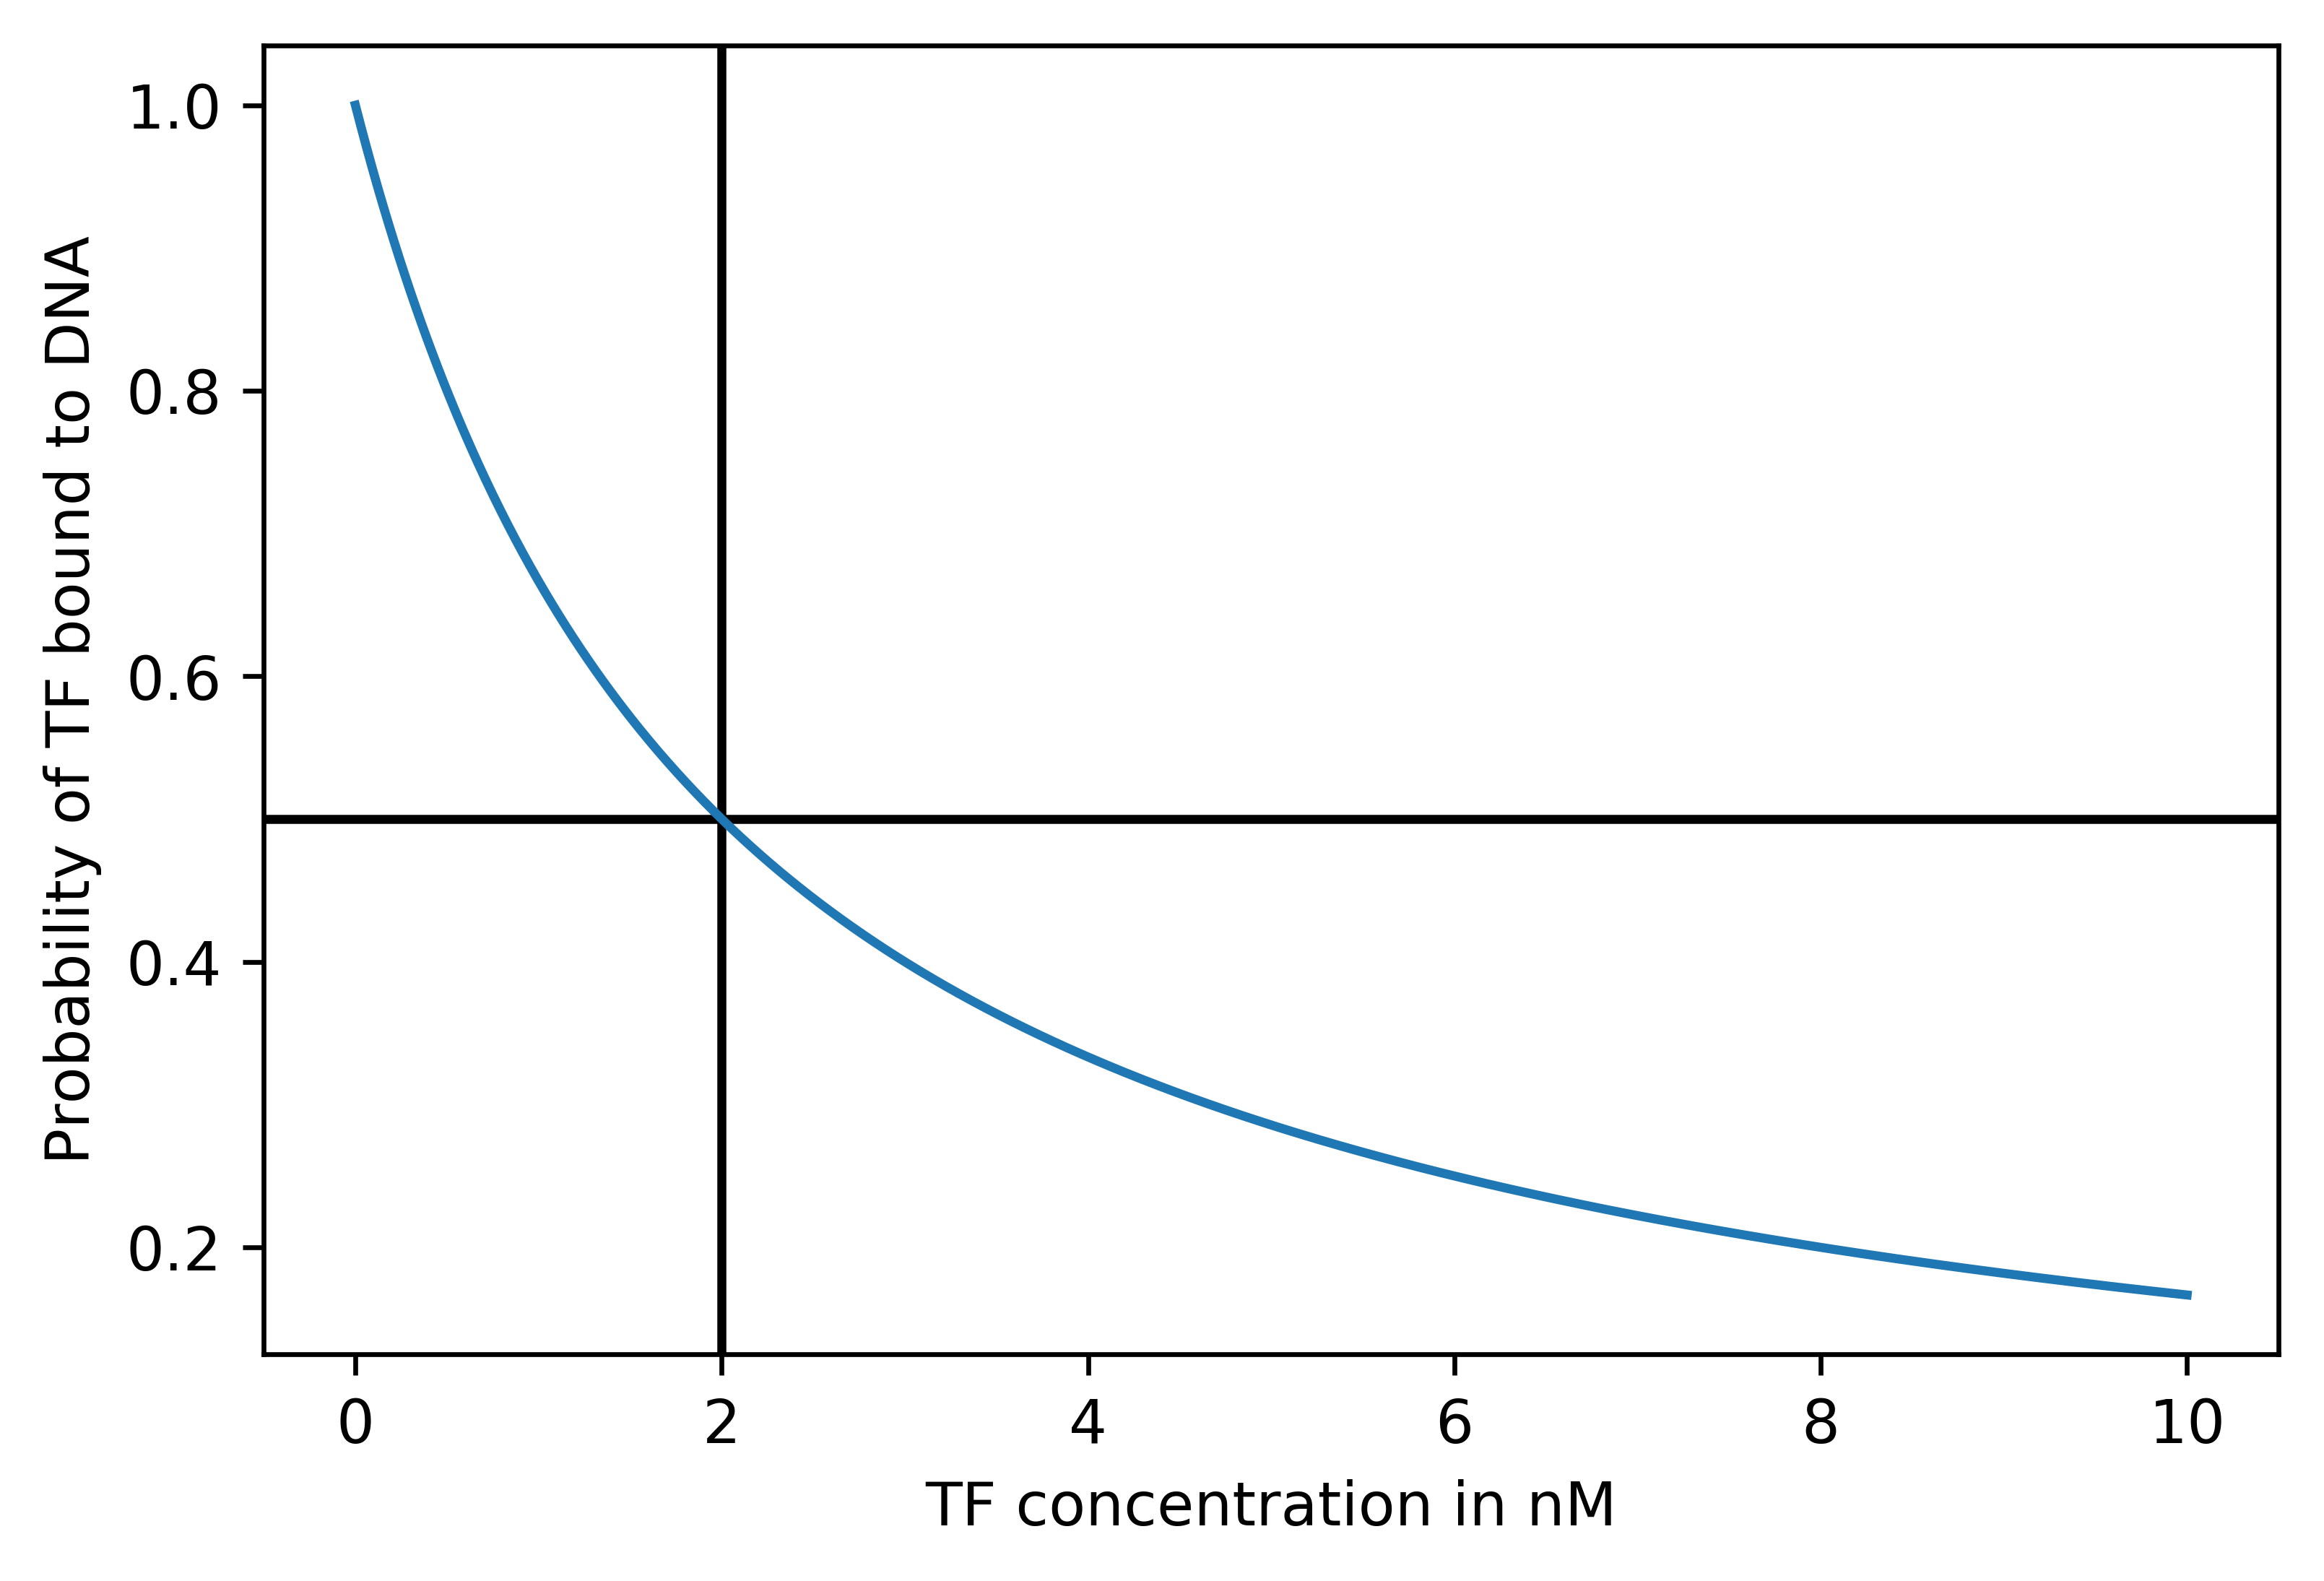

In [20]:
figure(dpi=600)
#transcription factor concentartion
T = linspace(0,10,1000) #generates a colleciton 1000 of points between 0,10  
kd=2
P = kd/(kd+T)
axhline(0.5, color='black')
axvline(2, color='black')
plot(T,P)


ylabel('Probability of TF bound to DNA')
xlabel('TF concentration in nM')



# Recomended paper 

Practical steps to digital organism models, from laboratory model species to ‘Crops in silico'

https://doi.org/10.1093/jxb/ery435

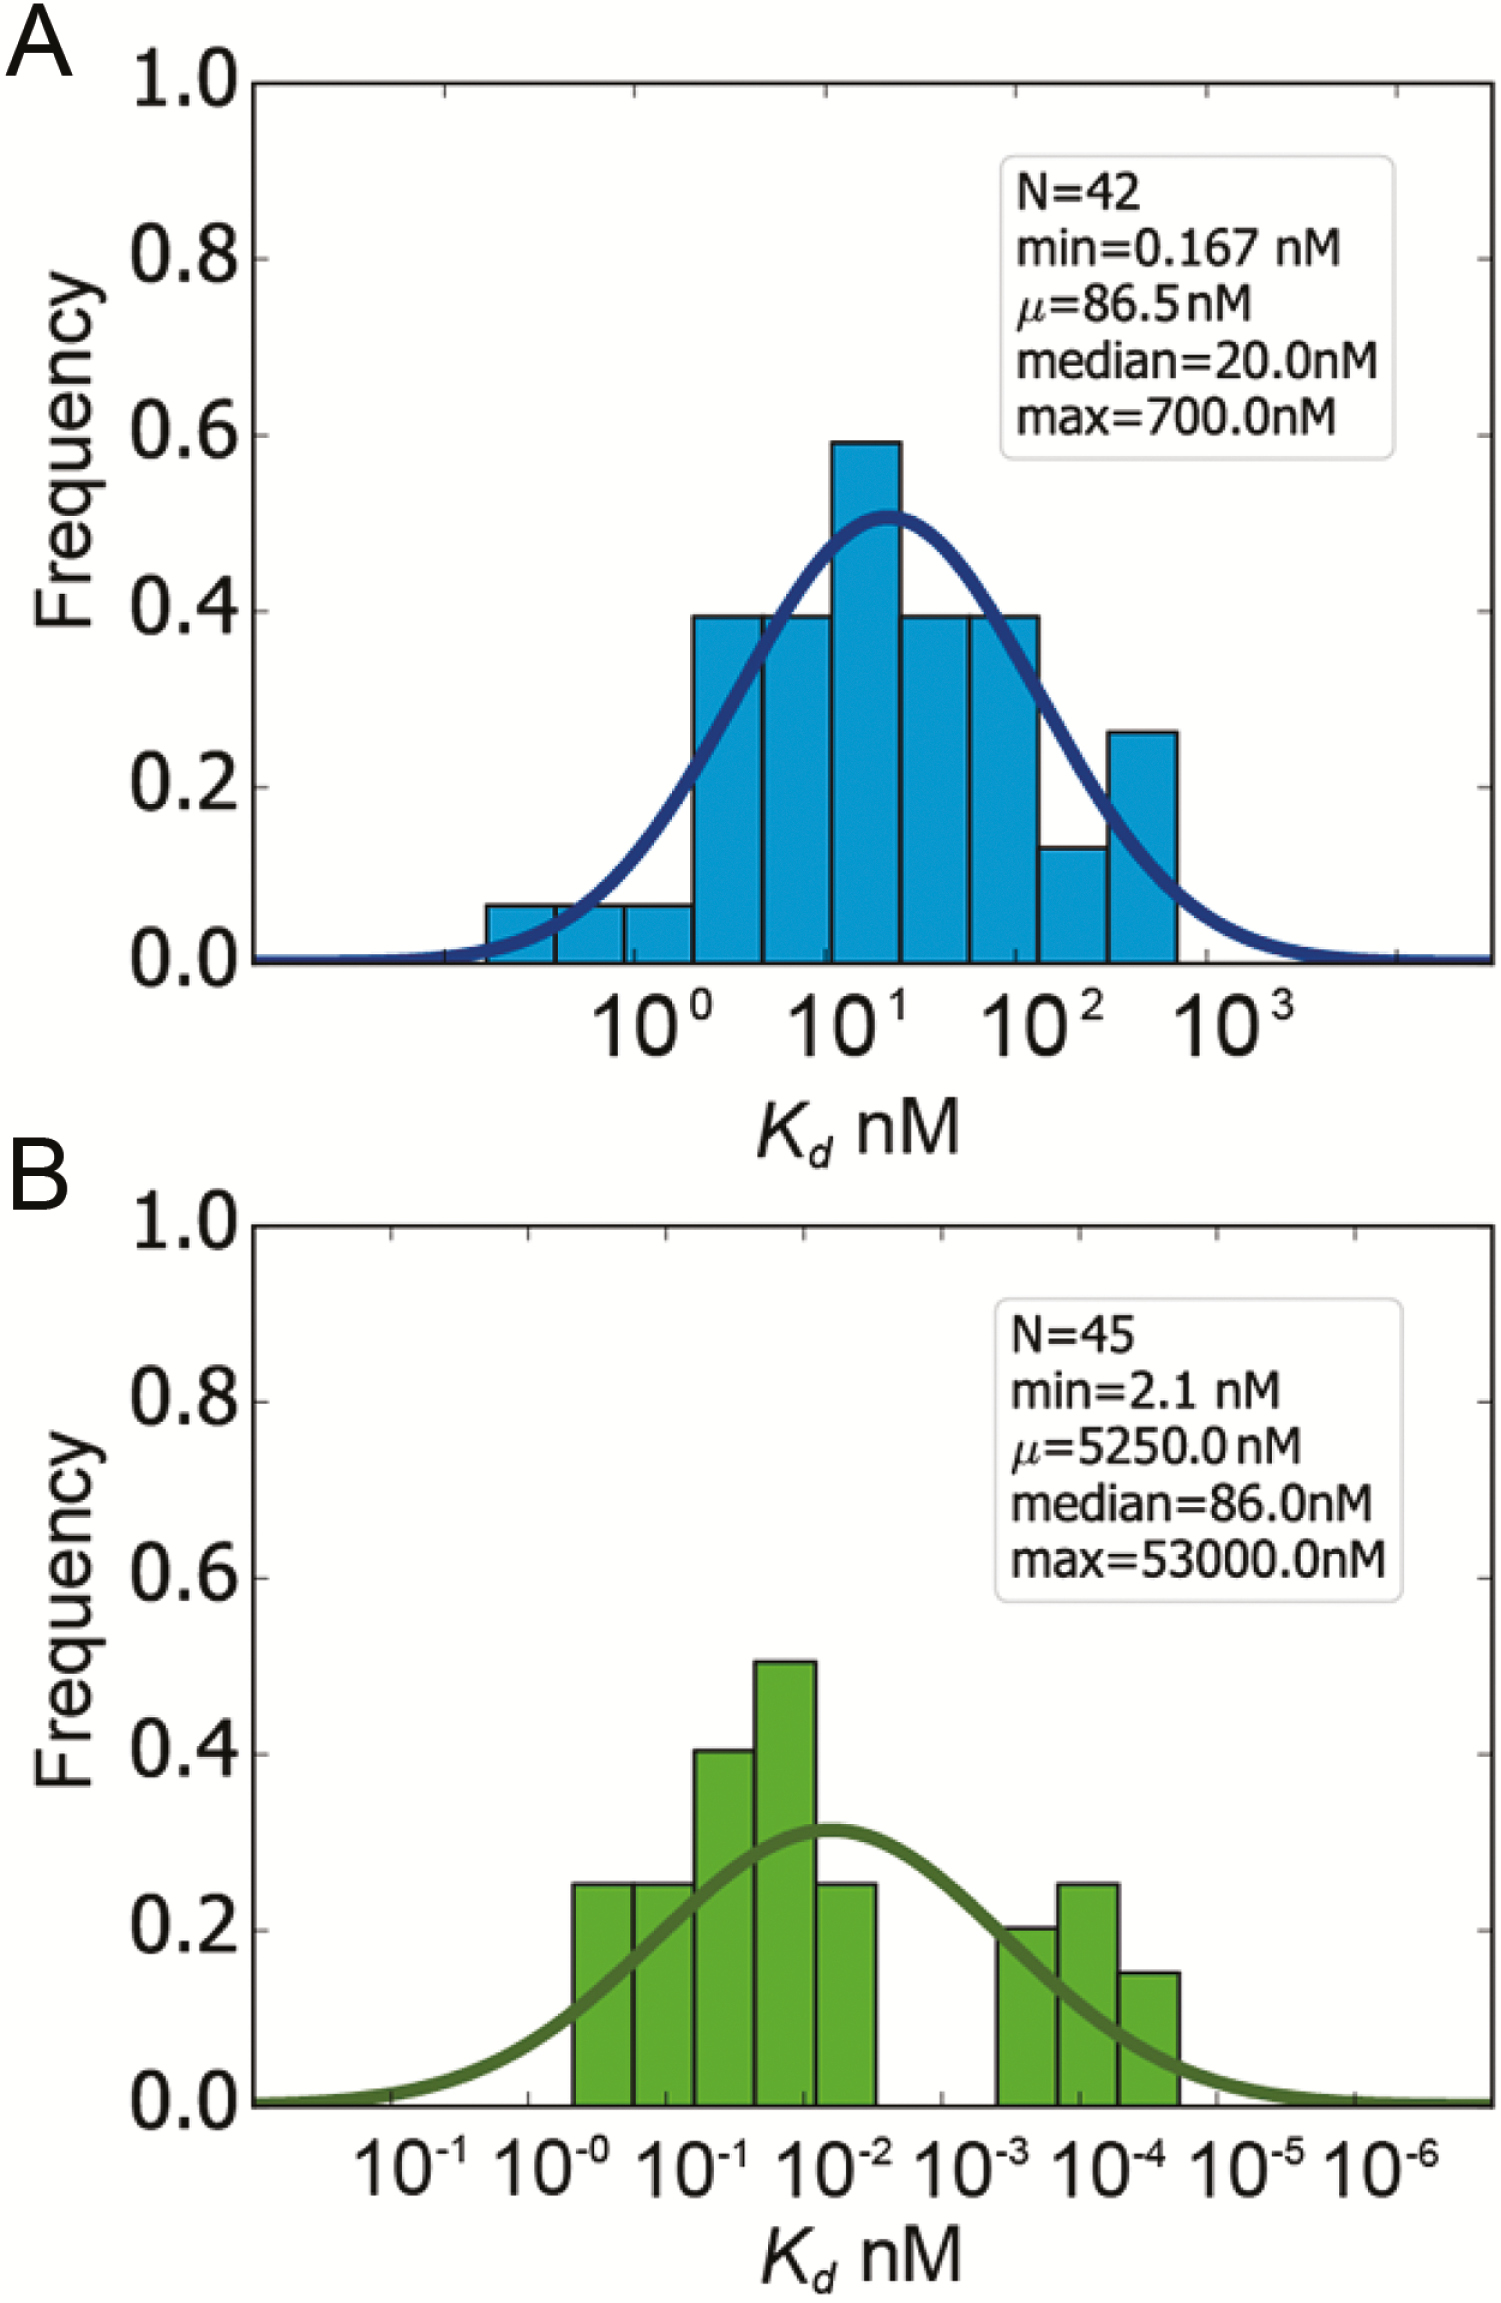

In [25]:
from IPython.display import Image
Image('distributions.jpeg', width=500,height=500)